# Stocks Analysis

In this sample analysis, I will focus on exploratory data analysis of stock prices. This is mainly just for practicing data visualization. It is not meant to be taken as financial advice.
____
I'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Getting the Data and Setting the Environment

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
##Using Alpha Vantage
import os

In [3]:
ALPHAVANTAGE_API_KEY = os.getenv('15YOWHJ0G70G415I')

In [4]:
start_date = datetime.datetime(2006, 1, 1)
start_date

datetime.datetime(2006, 1, 1, 0, 0)

In [5]:
end_date = datetime.datetime(2016, 1, 1)
end_date

datetime.datetime(2016, 1, 1, 0, 0)

In [6]:
BAC = data.DataReader('BAC', 'av-daily', start=start_date, end=end_date, api_key="ALPHAVANTAGE_API_KEY")

In [7]:
C = data.DataReader('C', 'av-daily', start=start_date, end=end_date, api_key="ALPHAVANTAGE_API_KEY")

In [8]:
GS = data.DataReader('GS', 'av-daily', start=start_date, end=end_date, api_key="ALPHAVANTAGE_API_KEY")

In [9]:
JPM = data.DataReader('JPM', 'av-daily', start=start_date, end=end_date, api_key="ALPHAVANTAGE_API_KEY")

In [10]:
MS = data.DataReader('MS', 'av-daily', start=start_date, end=end_date, api_key="ALPHAVANTAGE_API_KEY")

In [11]:
WFC = data.DataReader('WFC', 'av-daily', start=start_date, end=end_date, api_key="ALPHAVANTAGE_API_KEY")

In [12]:
BAC.head()

,open,high,low,close,volume
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970700
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15619400


Creating a list of the ticker symbols (as strings) in alphabetical order called tickers

In [13]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Combining the bank dataframes together to a single data frame called bank_stocks

In [14]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys = tickers, axis = 1)
bank_stocks.head()

BAC                                     C                       \
             open   high    low  close    volume   open   high    low  close   
2006-01-03  46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04  47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05  46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06  46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09  46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

                      ...     MS                                    WFC  \
              volume  ...   open   high      low  close   volume   open   
2006-01-03  15376000  ...  57.17  58.49  56.7400  58.31  5377000  63.20   
2006-01-04  18709000  ...  58.70  59.28  58.3500  58.35  7977800  63.60   
2006-01-05  11431000  ...  58.55  58.59  58.0200  58.51  5778000  63.00   
2006-01-06  13702000  ...  58.77  58.85  58.0500  58.57  6889800  63.16   
2006-01-09  16807000  ...  58.63  59.29  58.6244  59.19  4144500  63.35   

                                          
             high    low  close   volume  
2006-01-03  63.95  62.39  63.80  5508200  
2006-01-04  63.64  62.73  63.06  5435000  
2006-01-05  63.11  62.62  62.99  5079000  
2006-01-06  63.55  62.77  63.36  4201900  
2006-01-09  63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

In [15]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.index.name = 'Date'

In [16]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04   47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05   46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06   46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09   46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

Bank Ticker            ...     MS                                    WFC  \
Stock Info     volume  ...   open   high      low  close   volume   open   
Date                   ...                                                 
2006-01-03   15376000  ...  57.17  58.49  56.7400  58.31  5377000  63.20   
2006-01-04   18709000  ...  58.70  59.28  58.3500  58.35  7977800  63.60   
2006-01-05   11431000  ...  58.55  58.59  58.0200  58.51  5778000  63.00   
2006-01-06   13702000  ...  58.77  58.85  58.0500  58.57  6889800  63.16   
2006-01-09   16807000  ...  58.63  59.29  58.6244  59.19  4144500  63.35   

Bank Ticker                                
Stock Info    high    low  close   volume  
Date                                       
2006-01-03   63.95  62.39  63.80  5508200  
2006-01-04   63.64  62.73  63.06  5435000  
2006-01-05   63.11  62.62  62.99  5079000  
2006-01-06   63.55  62.77  63.36  4201900  
2006-01-09   63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

# Exploratory Analysis

What is the max Close price for each bank's stock throughout the time period?

In [17]:
bank_stocks.xs('close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

Checking the returns of the stocks by creating a new dataframe and filling this up with the data.

In [18]:
returns = pd.DataFrame()

In [19]:
returns

""


In [20]:
returns = (bank_stocks.xs('close', axis=1, level='Stock Info').pct_change())
returns.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [21]:
returns.rename(columns = lambda x: x+' Return', inplace=True)
returns.head()

Bank Ticker,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


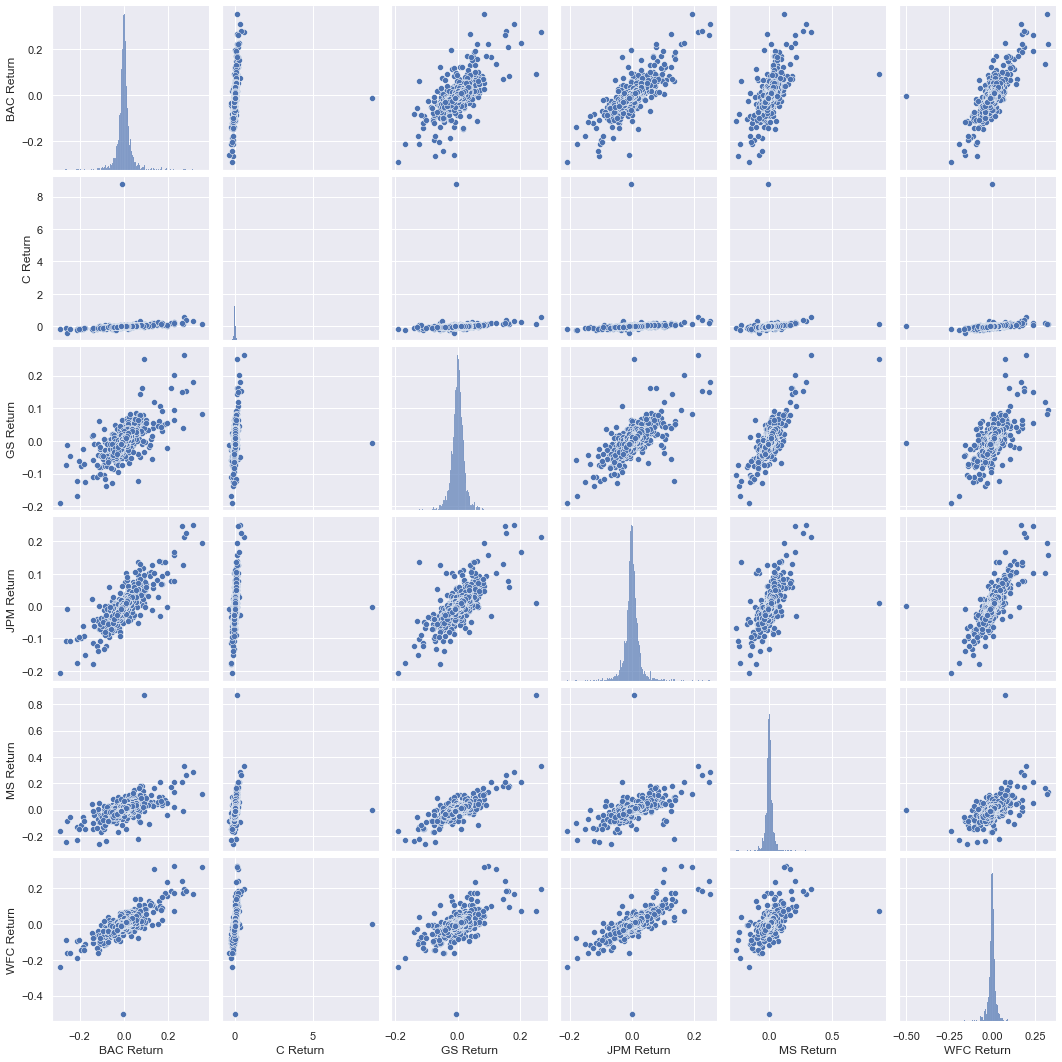

In [22]:
sns.pairplot(returns[1:])

When did each bank stock had the best and worst single day returns?

In [23]:
## Worst single day return
returns.idxmin()

Bank Ticker
BAC Return    2009-01-20
C Return      2009-02-27
GS Return     2009-01-20
JPM Return    2009-01-20
MS Return     2008-10-09
WFC Return    2006-08-14
dtype: object

In [24]:
## Best single day return
returns.idxmax()

Bank Ticker
BAC Return    2009-04-09
C Return      2011-05-09
GS Return     2008-11-24
JPM Return    2009-01-21
MS Return     2008-10-13
WFC Return    2008-07-16
dtype: object

Using the standard deviation of the returns, we can the riskiness of the stock and then see which one is the riskiest over the time period.

In [25]:
returns.std()

Bank Ticker
BAC Return    0.036628
C Return      0.179066
GS Return     0.025358
JPM Return    0.027651
MS Return     0.037821
WFC Return    0.031838
dtype: float64

We can also check for the specific year, like in 2015.

In [26]:
returns.loc['2015-01-01':'2015-12-31'].std()

Bank Ticker
BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Let's check Morgan Stanley's 2015 returns.

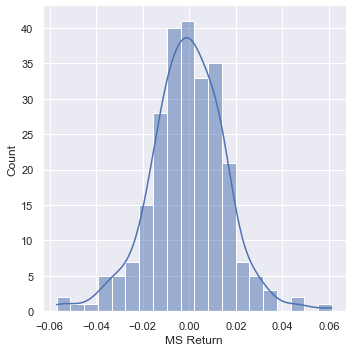

In [27]:
sns.displot(returns['MS Return'].loc['2015-01-01':'2015-12-31'],kde=True,bins=20)

Let's also check Citigroup's returns on the year of the financial crisis in 2008.

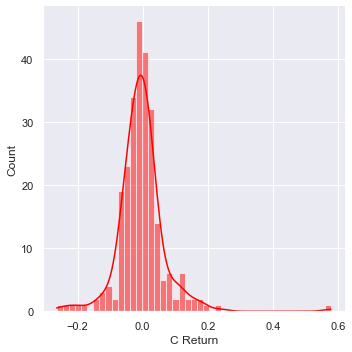

In [28]:
sns.displot(returns['C Return'].loc['2008-01-01':'2008-12-31'], kde=True, color='red')

# Using some more visualizations for analysis

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

Let's check the closing price for each bank during the entire time period.

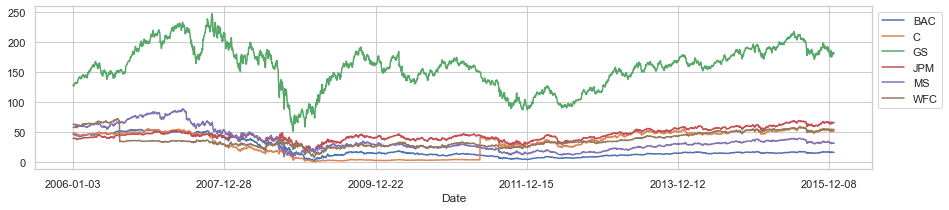

In [30]:
bank_stocks.xs('close', axis=1, level='Stock Info').plot(figsize=(15,3))
plt.legend(bbox_to_anchor=[1,1])

In [31]:
bank_stocks.xs('close', axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

Using Bank of America as an example.

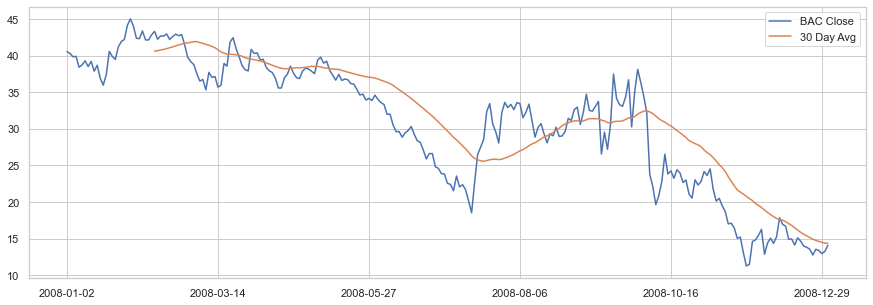

In [32]:
plt.figure(figsize=(15,5))
BAC['close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC Close')
BAC['close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

Using a heatmap of the correlation between the stocks Close Price.

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

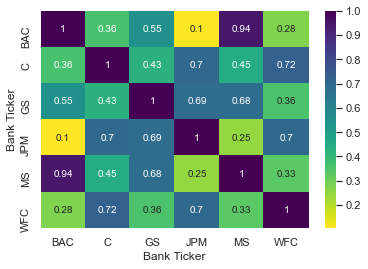

In [33]:
sns.heatmap(bank_stocks.xs('close', axis=1, level='Stock Info').corr(), annot=True, cmap='viridis_r')

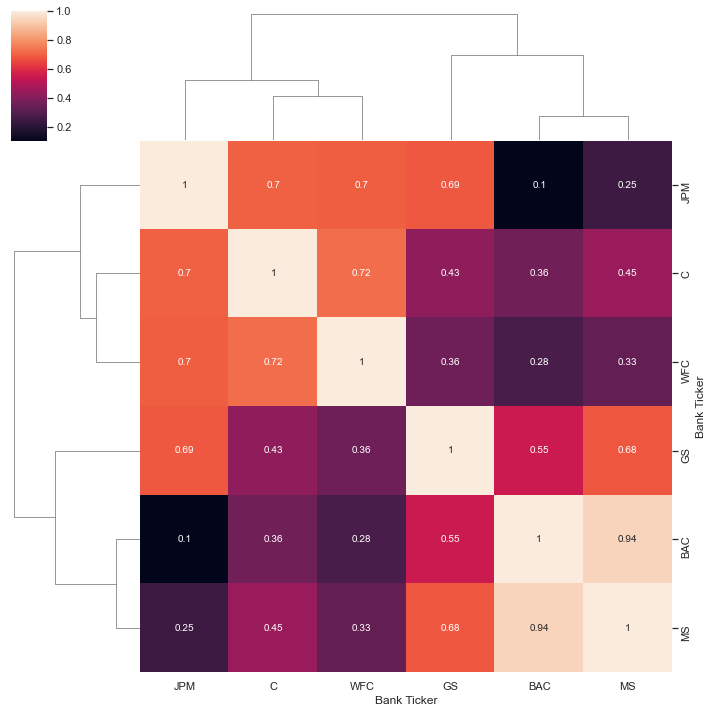

In [34]:
sns.clustermap(bank_stocks.xs('close', axis=1, level='Stock Info').corr(),annot=True)

In [35]:
bank_stocks.xs('close', axis=1, level='Stock Info').corr().iplot(kind='heatmap', colorscale='rdylbu')